# Trabalho 1 - Classificação - Risco de Obesidade - Data Mining

*   **Aluno: Lucas Tavares S. Ferreira**
*   **DRE: 120152739**
*   **Acurácia no Kaggle: Private Score: 0.89938 | Public Score: 0.89848**
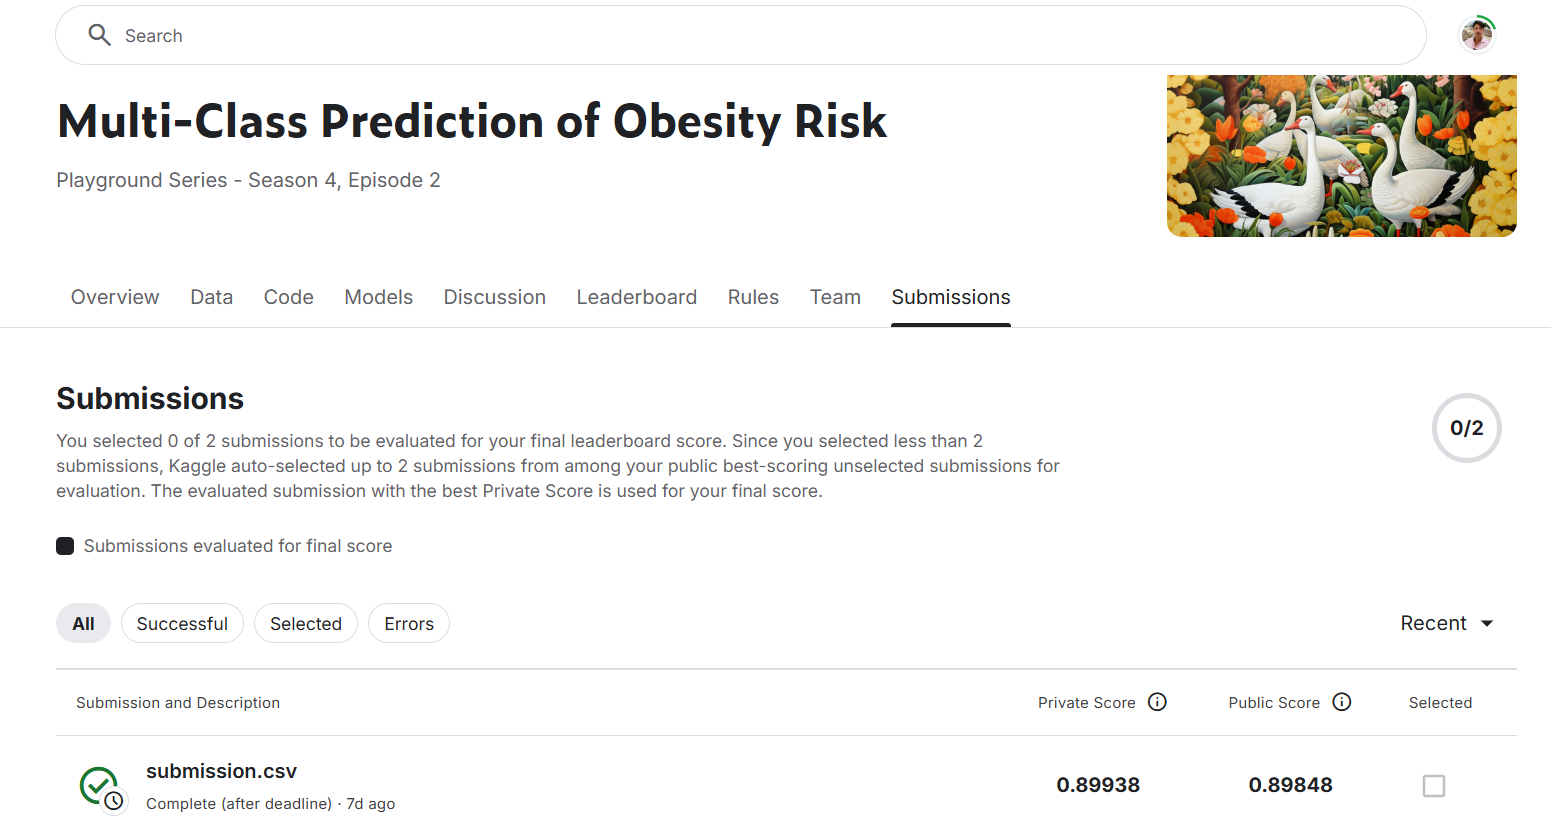





In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Carregando os Dados

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Análise Exploratória (EDA)

In [ ]:
train_data.head()


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
test_data.head()


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [ ]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [ ]:
for col in train_data.columns:
    if train_data[col].dtype == 'object':
        print(col, train_data[col].unique())

Gender ['Male' 'Female']
family_history_with_overweight ['yes' 'no']
FAVC ['yes' 'no']
CAEC ['Sometimes' 'Frequently' 'no' 'Always']
SMOKE ['no' 'yes']
SCC ['no' 'yes']
CALC ['Sometimes' 'no' 'Frequently']
MTRANS ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
NObeyesdad ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


**As colunas:**


1.   'Gender'
2.   'family_history_with_overweight'
3.   'FAVC'
4.   'SMOKE'
5.   'SCC'

**Contém valores binários**

As colunas:
1. 'CALC'
2. 'MTRANS'
3. 'CAEC'
4. 'NObeyesdad'

**Possuem valores categóricos. Vamos excluir 'NObeyesdad' da lista pois esta é a nossa variável de interesse.**


In [ ]:
binary_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

categorical_features = ['CAEC', 'CALC', 'MTRANS']

In [ ]:
for col in train_data.columns:
    if col in categorical_features and col != 'NObeyesdad':
        print(col, train_data[col].unique(), test_data[col].unique())

print('NObeyesdad', train_data['NObeyesdad'].unique())

CAEC ['Sometimes' 'Frequently' 'no' 'Always'] ['Sometimes' 'Always' 'Frequently' 'no']
CALC ['Sometimes' 'no' 'Frequently'] ['Sometimes' 'no' 'Frequently' 'Always']
MTRANS ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike'] ['Public_Transportation' 'Automobile' 'Walking' 'Bike' 'Motorbike']
NObeyesdad ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


**Os valores de CAEC e CALC são:**
1. 'no',
2. 'Sometimes',
3. 'Frequently',
4. 'Always'.

**Os valoroes para MTRANS são:**
1. 'Public_Transportation',
2. 'Automobile',
3. 'Motorbike',
4. 'Bike',
5. 'Walking'.

**Os valores para NObeyesdad são:**
1. 'Insufficient_Weight',
2. 'Normal_Weight',
3. 'Overweight_Level_I',
4. 'Overweight_Level_II',
5. 'Obesity_Type_I',
6. 'Obesity_Type_II',
7. 'Obesity_Type_III'.

# Pré-processamento de dados

In [ ]:
binary_encoder = OrdinalEncoder(
    categories=[
        ['Female', 'Male'],
        ['no', 'yes'],
        ['no', 'yes'],
        ['no', 'yes'],
        ['no', 'yes']
    ]
)

train_data[binary_features] = binary_encoder.fit_transform(train_data[binary_features])
test_data[binary_features] = binary_encoder.transform(test_data[binary_features])

categorical_encoder = OrdinalEncoder(
    categories=[
        ['no', 'Sometimes', 'Frequently', 'Always'],
        ['no', 'Sometimes', 'Frequently', 'Always'],
        ['Public_Transportation', 'Automobile', 'Motorbike', 'Bike', 'Walking']
    ]
)

train_data[categorical_features] = categorical_encoder.fit_transform(train_data[categorical_features])
test_data[categorical_features] = categorical_encoder.transform(test_data[categorical_features])

# Data visualization

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>],
       [<Axes: title={'center': 'CH2O'}>,
        <Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>]],
      dtype=object)

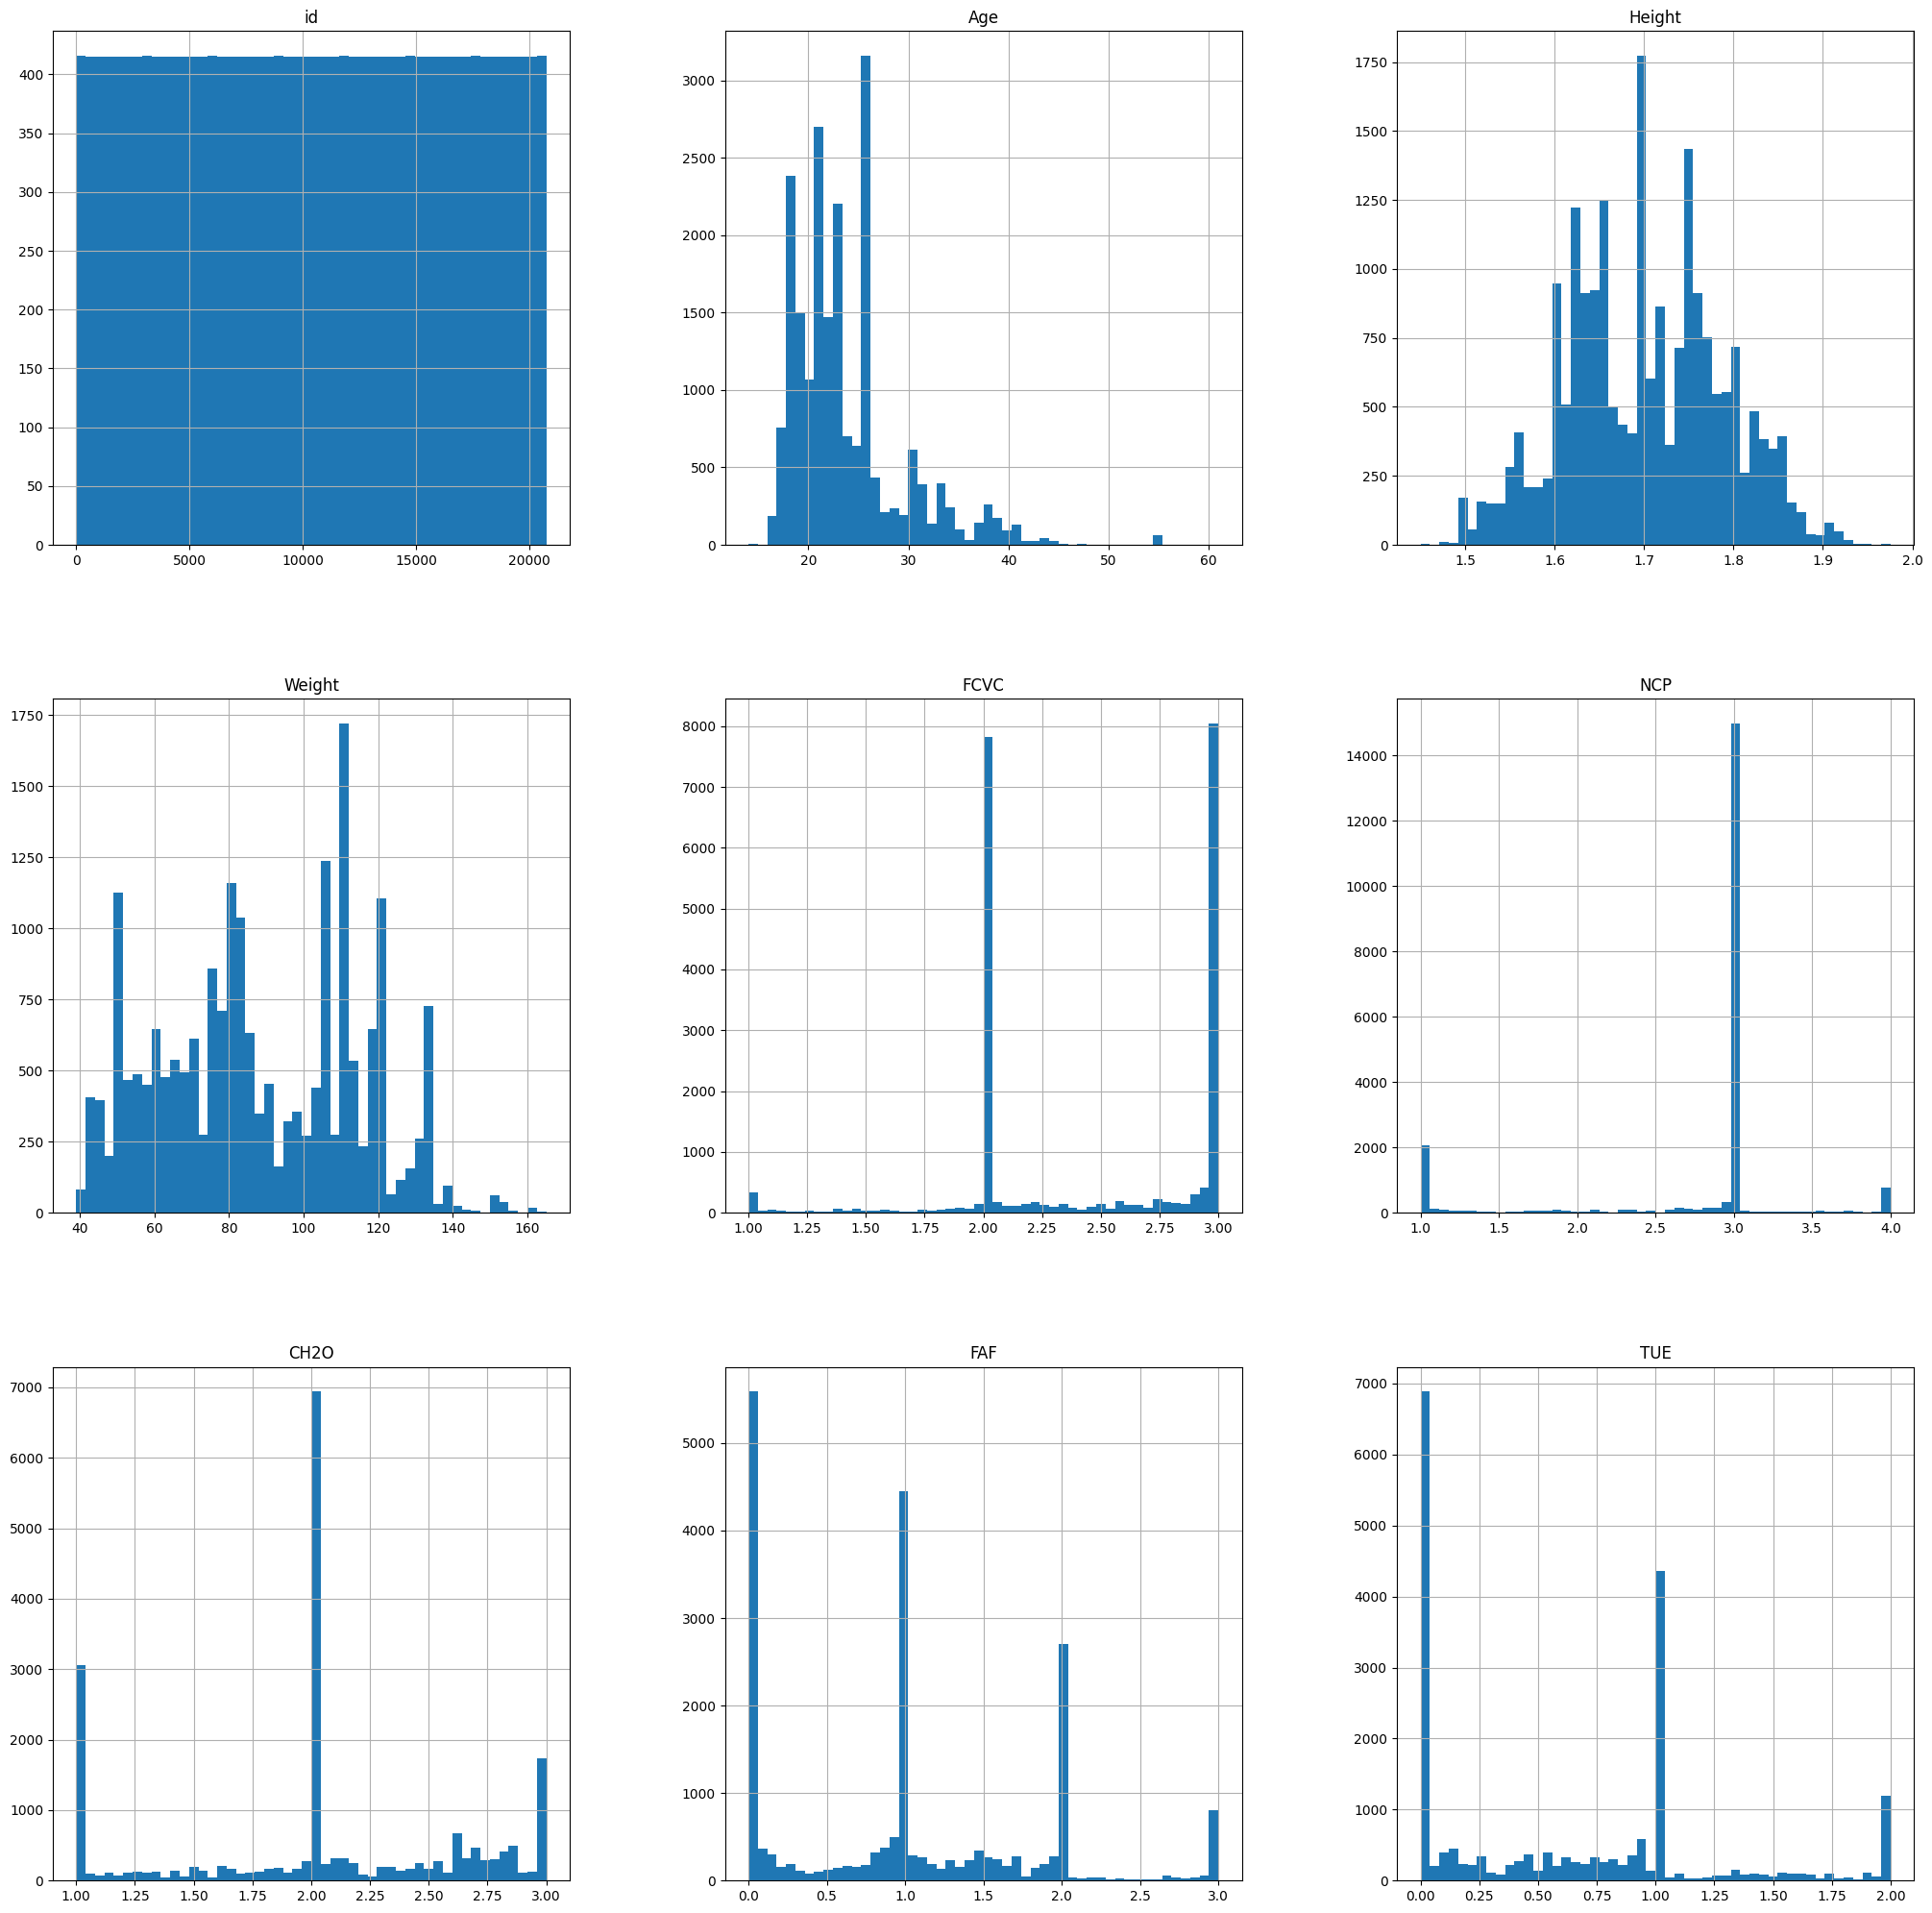

In [ ]:
train_data.hist(bins=50, figsize=(25, 25))

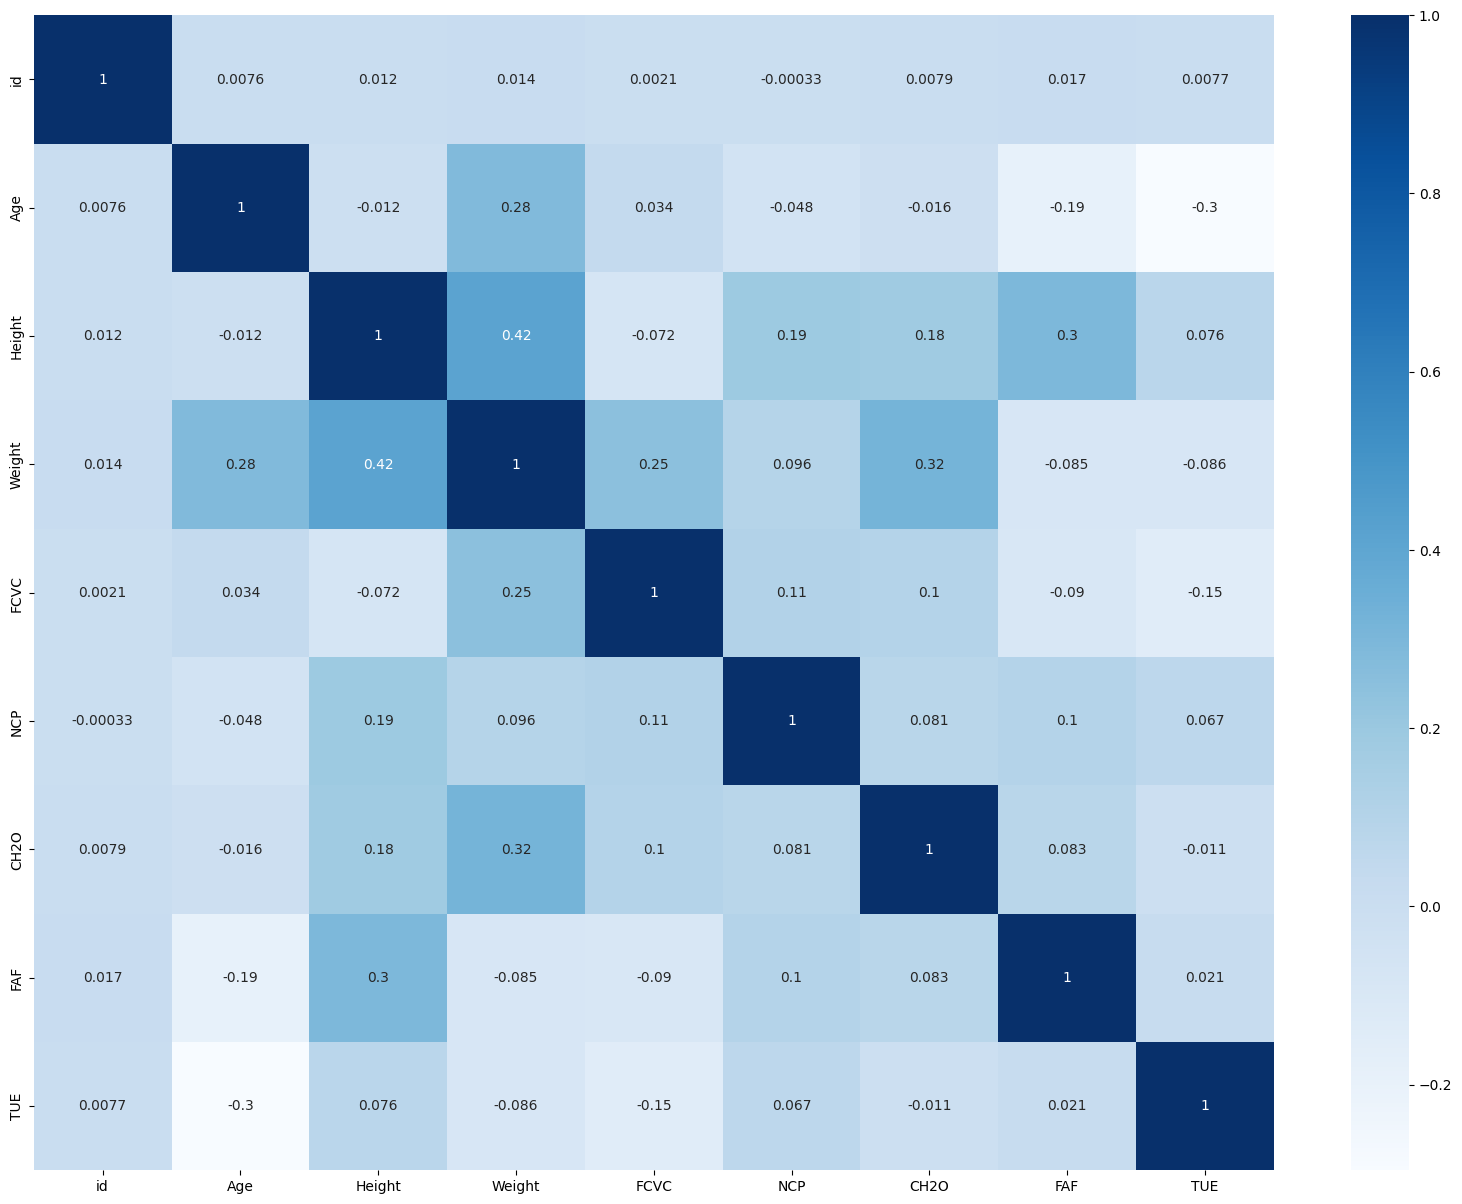

In [ ]:
corr = train_data.corr(numeric_only = True)

plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

In [ ]:
encoder = OrdinalEncoder(
    categories = [
        [
            'Insufficient_Weight',
            'Normal_Weight',
            'Overweight_Level_I',
            'Overweight_Level_II',
            'Obesity_Type_I',
            'Obesity_Type_II',
            'Obesity_Type_III'
        ]
    ]
)

correlation_data = train_data.copy()

correlation_data['NObeyesdad'] = pd.DataFrame(encoder.fit_transform(correlation_data[['NObeyesdad']]))

corr_matrix = correlation_data.corr(numeric_only = False)['NObeyesdad']

print(corr_matrix.abs().sort_values(ascending=False))

NObeyesdad                        1.000000
Weight                            0.921250
family_history_with_overweight    0.522026
CAEC                              0.364052
Age                               0.356211
CH2O                              0.273154
FCVC                              0.272933
FAF                               0.234745
FAVC                              0.215401
CALC                              0.189361
SCC                               0.184959
Height                            0.150141
TUE                               0.121009
MTRANS                            0.117953
Gender                            0.067699
NCP                               0.027227
id                                0.016240
SMOKE                             0.013501
Name: NObeyesdad, dtype: float64


Excluindo o "Weight", as três principais características que têm maior impacto na variável alvo são: 'family_history_with_overweight', 'CAEC' e 'Age'.

## Histórico familiar de sobrepeso

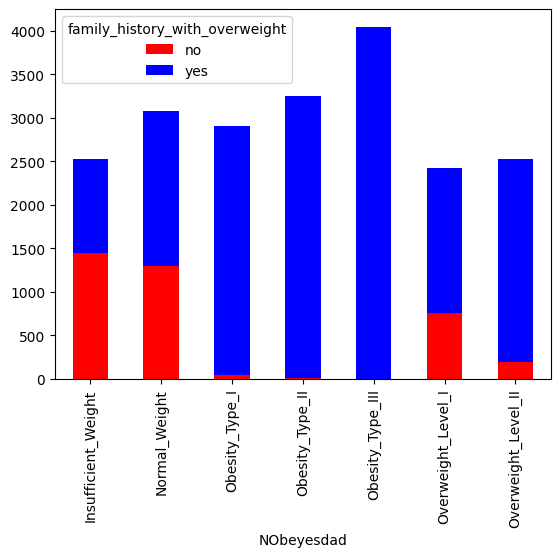

In [ ]:
family_df = train_data.groupby('NObeyesdad')['family_history_with_overweight'].value_counts().unstack()
family_df = family_df.rename(index={0: 'no', 1: 'yes'}, columns={0: 'no', 1: 'yes'})

family_df.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.show()


Podemos observar que a maioria das pessoas com obesidade e sobrepeso tem histórico familiar de sobrepeso.

## CAEC, ou "Consumo de alimentos entre as refeições"

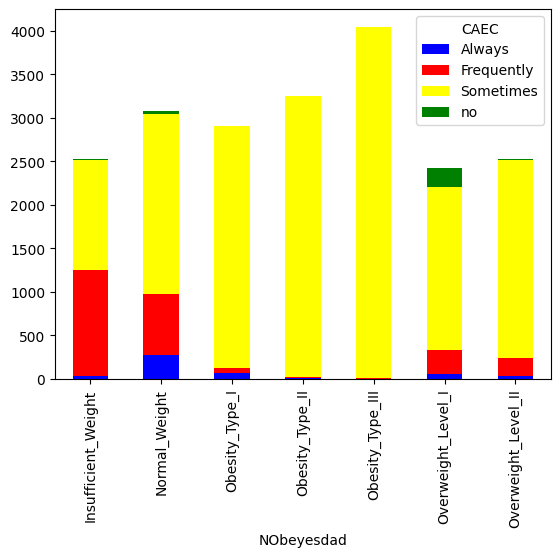

In [ ]:
caec_df = train_data.groupby('NObeyesdad')['CAEC'].value_counts().unstack()
caec_df = caec_df.rename(index={0: 'no', 1: 'Sometimes', 2: 'Frequently', 3: 'Always'}, columns={0: 'no', 1: 'Sometimes', 2: 'Frequently', 3: 'Always'})

caec_df.plot(kind='bar', stacked=True, color=['blue', 'red', 'yellow', 'green'])
plt.show()

Embora o consumo de alimentos entre as refeições da maioria das pessoas varie muito, podemos observar que a maioria das pessoas com obesidade e sobrepeso consome alimentos entre as refeições 'Às vezes'.

## Idade

<Axes: >

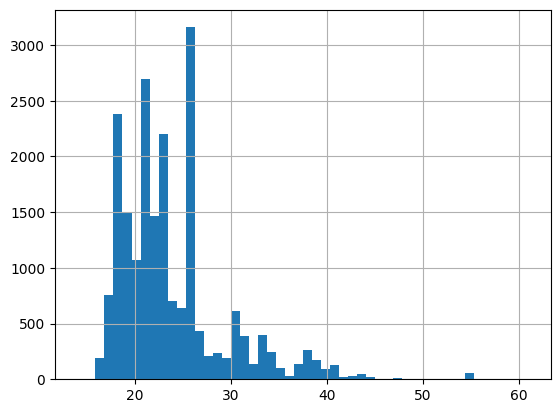

In [ ]:
train_data['Age'].hist(bins=50)

<Axes: xlabel='NObeyesdad', ylabel='Age'>

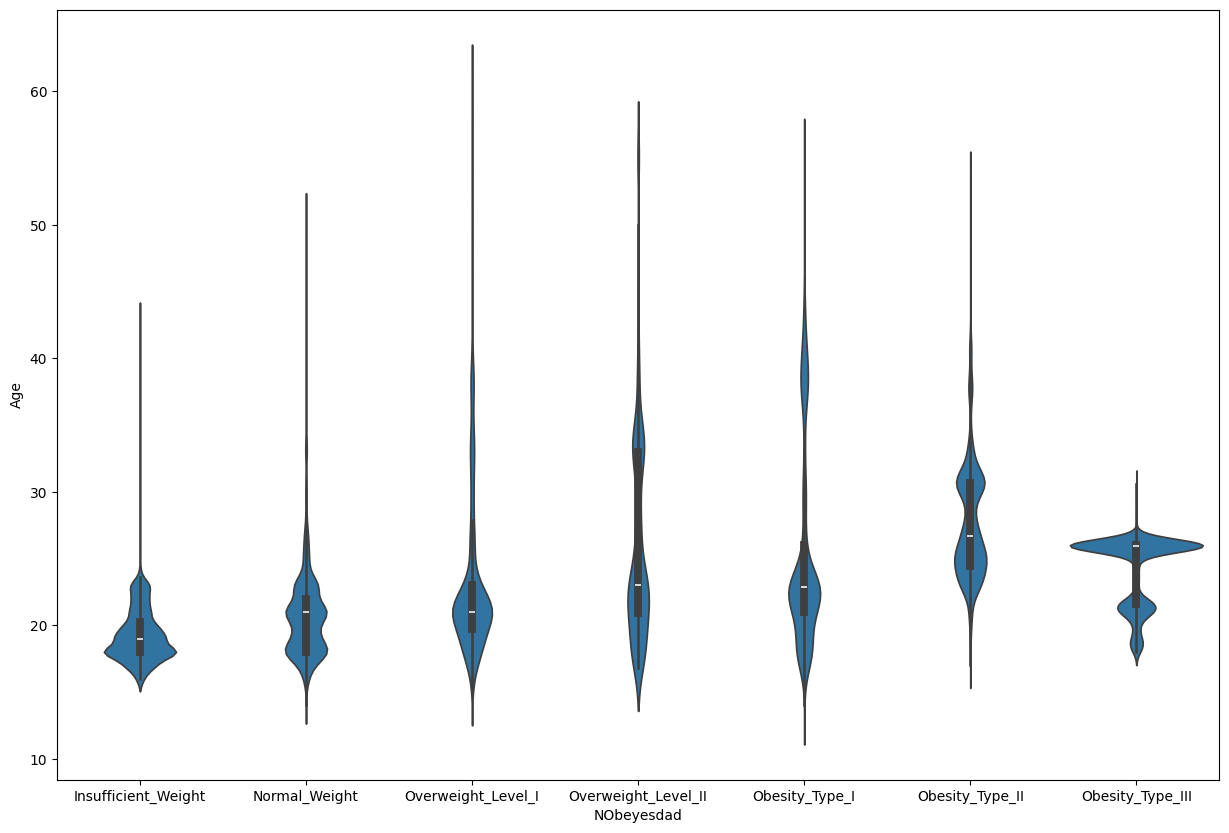

In [ ]:
plt.figure(figsize=(15, 10))
sns.violinplot(
    x='NObeyesdad',
    y='Age',
    data=train_data,
    order=[
        'Insufficient_Weight',
        'Normal_Weight',
        'Overweight_Level_I',
        'Overweight_Level_II',
        'Obesity_Type_I',
        'Obesity_Type_II',
        'Obesity_Type_III'
    ]
)

# Feature Engineering

Adicionaremos um novo recurso, "IMC", para prever melhor a variável-alvo.

In [ ]:
train_data['BMI'] = train_data['Weight'] / (train_data['Height'] ** 2)
test_data['BMI'] = test_data['Weight'] / (test_data['Height'] ** 2)

In [ ]:
train_data['BMI'].describe()

,BMI
count,20758.000000
mean,30.241842
std,8.333932
min,12.868541
25%,24.088223
50%,29.384757
75%,37.011168
max,54.997991


In [ ]:
test_data['BMI'].describe()

,BMI
count,13840.000000
mean,30.122959
std,8.273030
min,12.812830
25%,23.875115
50%,29.384757
75%,36.727290
max,51.227736


# Seleção e Treinamento de Modelos

Começaremos com Naive Bayes, pois é um modelo simples e pode ser usado como base. Em seguida, testaremos outros modelos, como Random Forest, na esperança de obter melhores resultados.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_data.drop('NObeyesdad', axis=1), train_data['NObeyesdad'], test_size=0.2, random_state=42)

## Naive Bayes


🔍 Accuracy: 0.6568

📋 Classification Report:

                     precision  recall  f1-score  support
Insufficient_Weight       0.70    0.80      0.75   524.00
Normal_Weight             0.65    0.41      0.51   626.00
Obesity_Type_I            0.34    0.66      0.45   543.00
Obesity_Type_II           0.78    0.92      0.85   657.00
Obesity_Type_III          0.94    1.00      0.97   804.00
Overweight_Level_I        0.63    0.31      0.41   484.00
Overweight_Level_II       0.53    0.26      0.35   514.00
accuracy                  0.66    0.66      0.66     0.66
macro avg                 0.65    0.62      0.61  4152.00
weighted avg              0.68    0.66      0.64  4152.00


<ipython-input-61-289ed60c52a5>:31: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


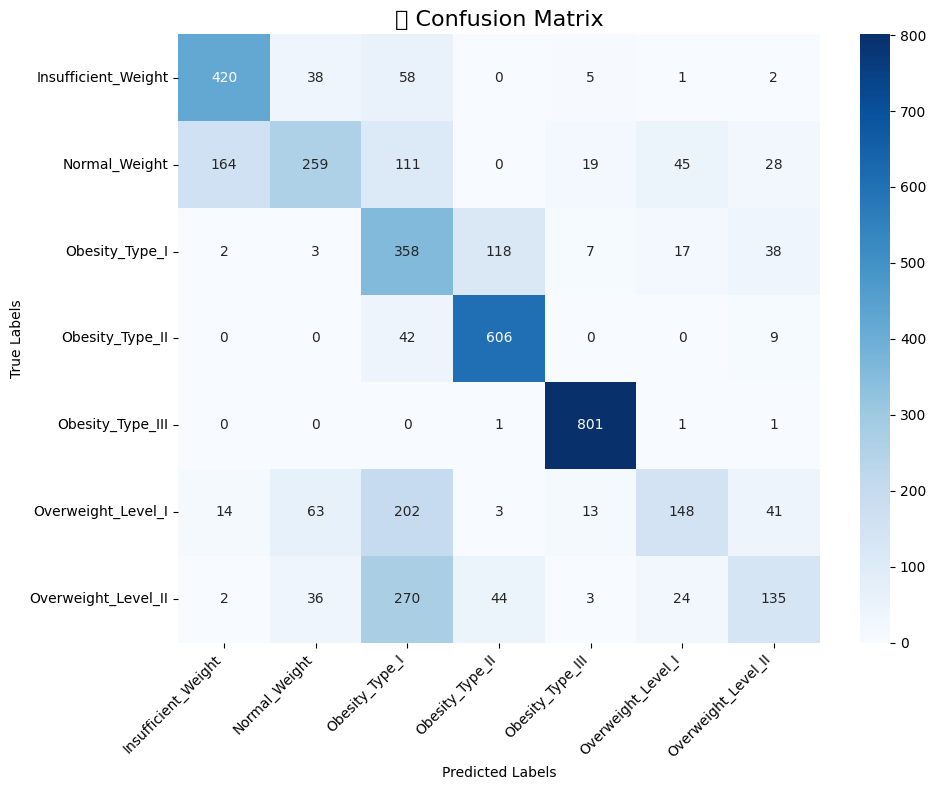

In [ ]:
# Train the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred = nb_model.predict(X_val)

# Accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"\n🔍 Accuracy: {accuracy:.4f}")

# Classification report
report = classification_report(y_val, y_pred, target_names=nb_model.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("\n📋 Classification Report:\n")
print(report_df.round(2))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred, labels=nb_model.classes_)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=nb_model.classes_,
            yticklabels=nb_model.classes_)
plt.title('📊 Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
test_predictions = nb_model.predict(test_data)

predictions_df = pd.DataFrame({'id': test_data['id'], 'NObeyesdad': test_predictions})

predictions_df.to_csv('predictions_nb.csv', index=False)

O arquivo .csv resultante obteve uma pontuação de 0,79263 ao ser submitido no kaggle.

## Random forest


🔍 Accuracy: 0.8856

📋 Classification Report:

                     precision  recall  f1-score  support
Insufficient_Weight       0.94    0.90      0.92   524.00
Normal_Weight             0.81    0.88      0.85   626.00
Obesity_Type_I            0.87    0.86      0.87   543.00
Obesity_Type_II           0.97    0.97      0.97   657.00
Obesity_Type_III          1.00    1.00      1.00   804.00
Overweight_Level_I        0.75    0.72      0.74   484.00
Overweight_Level_II       0.77    0.76      0.77   514.00
accuracy                  0.89    0.89      0.89     0.89
macro avg                 0.87    0.87      0.87  4152.00
weighted avg              0.89    0.89      0.89  4152.00


<ipython-input-74-d81cd7ba393e>:31: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


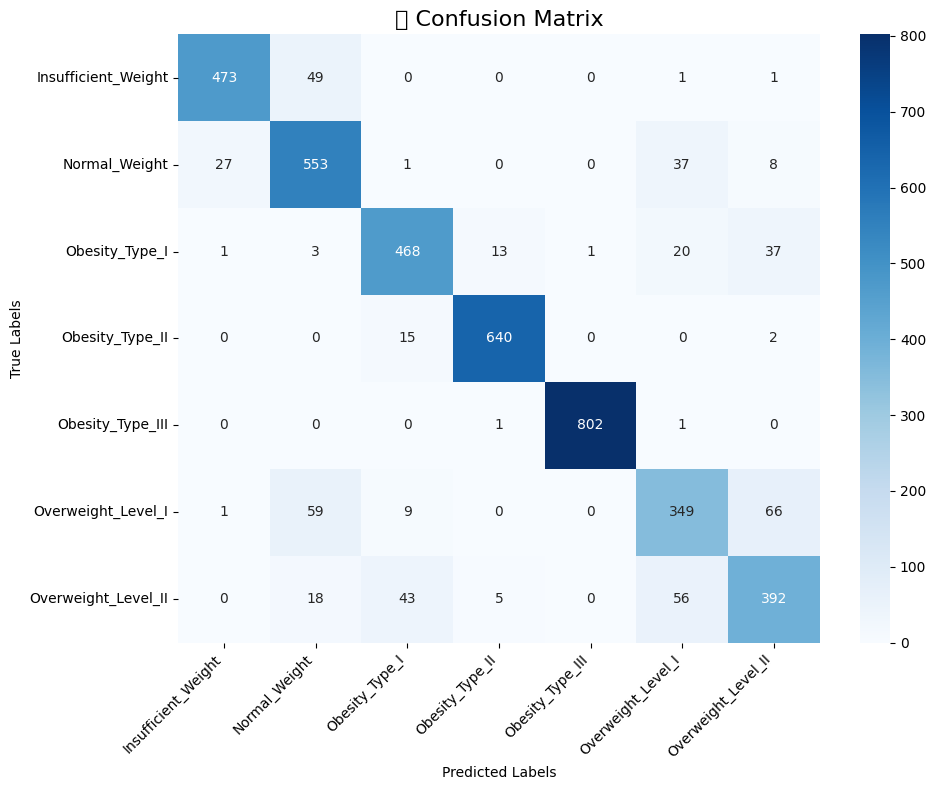

In [ ]:
# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_val)

# Accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"\n🔍 Accuracy: {accuracy:.4f}")

# Classification report
report = classification_report(y_val, y_pred, target_names=rf_model.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("\n📋 Classification Report:\n")
print(report_df.round(2))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred, labels=rf_model.classes_)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_,
            yticklabels=rf_model.classes_)
plt.title('📊 Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
test_predictions = rf_model.predict(test_data)

predictions_df = pd.DataFrame({'id': test_data['id'], 'NObeyesdad': test_predictions})

predictions_df.to_csv('predictions_rf.csv', index=False)

In [ ]:
# create the submission .csv
predictions_df.to_csv('submission.csv', index=False)

O arquivo .csv resultante obteve uma pontuação de 0.89812 ao ser submitido no kaggle.

# Tentativas anteriores

1. Inicialmente, foi utilizado o método get_dummies do pandas para codificar as variáveis categóricas, antes de se aplicar o OrdinalEncoder do scikit-learn. O arquivo .csv gerado foi submetido ao Kaggle, resultando em uma pontuação de 0,65823 com o modelo Naive Bayes (GaussianNB) e 0,88222 com o Random Forest.

2.  Em outro experimento, antes da inclusão do atributo "IMC", o dataset também foi carregado no Kaggle. Utilizando apenas o OrdinalEncoder (sem get_dummies), o Naive Bayes alcançou uma pontuação de 0,70484, enquanto o Random Forest obteve 0,89441.


    Abaixo, um gráfico que ilustra a evolução dos resultados conforme realizamos modificações no modelo:

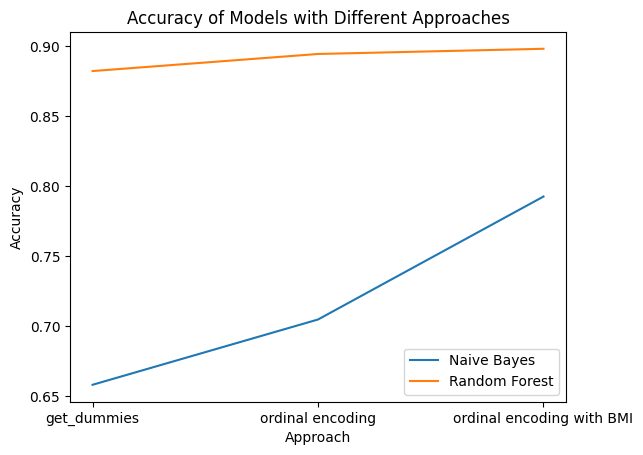

In [ ]:
approaches = ['get_dummies', 'ordinal encoding', 'ordinal encoding with BMI']
naive_bayes_scores = [0.65823, 0.70484, 0.79263]
random_forest_scores = [0.88222, 0.89441, 0.89812]

plt.plot(approaches, naive_bayes_scores, label='Naive Bayes')
plt.plot(approaches, random_forest_scores, label='Random Forest')

plt.xlabel('Approach')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models with Different Approaches')
plt.legend()

plt.show()

E agora para o código usando o get_dummies do pandas:

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [ ]:
columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

dummy_train_data = pd.get_dummies(train_data, columns=columns)
dummy_test_data = pd.get_dummies(test_data, columns=columns)

dummy_train_data, dummy_test_data = dummy_train_data.align(dummy_test_data, join='outer', axis=1, fill_value=0)

X_train = dummy_train_data.drop('NObeyesdad', axis=1)
y_train = dummy_train_data['NObeyesdad']

X_test = dummy_test_data.drop('NObeyesdad', axis=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


🔍 Accuracy: 0.6568

📋 Classification Report:

                     precision  recall  f1-score  support
Insufficient_Weight       0.70    0.80      0.75   524.00
Normal_Weight             0.65    0.41      0.51   626.00
Obesity_Type_I            0.34    0.66      0.45   543.00
Obesity_Type_II           0.78    0.92      0.85   657.00
Obesity_Type_III          0.94    1.00      0.97   804.00
Overweight_Level_I        0.63    0.31      0.41   484.00
Overweight_Level_II       0.53    0.26      0.35   514.00
accuracy                  0.66    0.66      0.66     0.66
macro avg                 0.65    0.62      0.61  4152.00
weighted avg              0.68    0.66      0.64  4152.00


<ipython-input-75-12fef307e726>:31: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


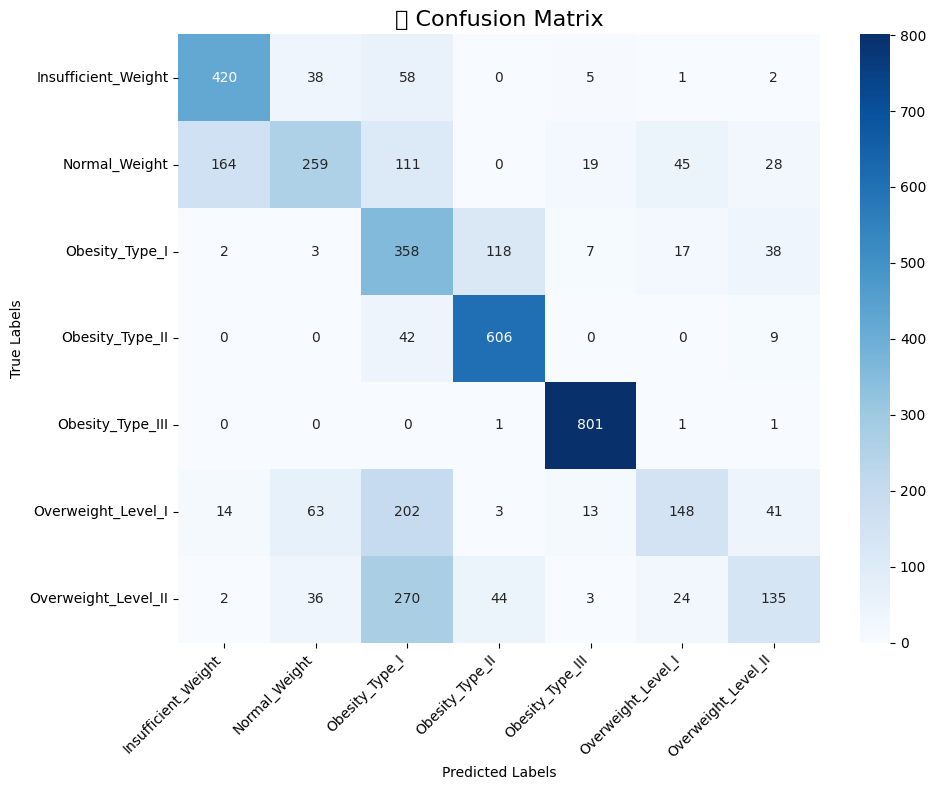

In [ ]:
# Train the model
dummy_nb_model = GaussianNB()
dummy_nb_model.fit(X_train, y_train)

# Predictions
y_pred = dummy_nb_model.predict(X_val)

# Accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"\n🔍 Accuracy: {accuracy:.4f}")

# Classification report
report = classification_report(y_val, y_pred, target_names=dummy_nb_model.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("\n📋 Classification Report:\n")
print(report_df.round(2))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred, labels=dummy_nb_model.classes_)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=dummy_nb_model.classes_,
            yticklabels=dummy_nb_model.classes_)
plt.title('📊 Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
test_predictions = dummy_nb_model.predict(dummy_test_data.drop('NObeyesdad', axis=1))

predictions_df = pd.DataFrame({'id': dummy_test_data['id'], 'NObeyesdad': test_predictions})

predictions_df.to_csv('predictions_dummy_naive_bayes.csv', index=False)


🔍 Accuracy: 0.8856

📋 Classification Report:

                     precision  recall  f1-score  support
Insufficient_Weight       0.94    0.90      0.92   524.00
Normal_Weight             0.81    0.88      0.85   626.00
Obesity_Type_I            0.87    0.86      0.87   543.00
Obesity_Type_II           0.97    0.97      0.97   657.00
Obesity_Type_III          1.00    1.00      1.00   804.00
Overweight_Level_I        0.75    0.72      0.74   484.00
Overweight_Level_II       0.77    0.76      0.77   514.00
accuracy                  0.89    0.89      0.89     0.89
macro avg                 0.87    0.87      0.87  4152.00
weighted avg              0.89    0.89      0.89  4152.00


<ipython-input-76-8e3a1a0a7c98>:31: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


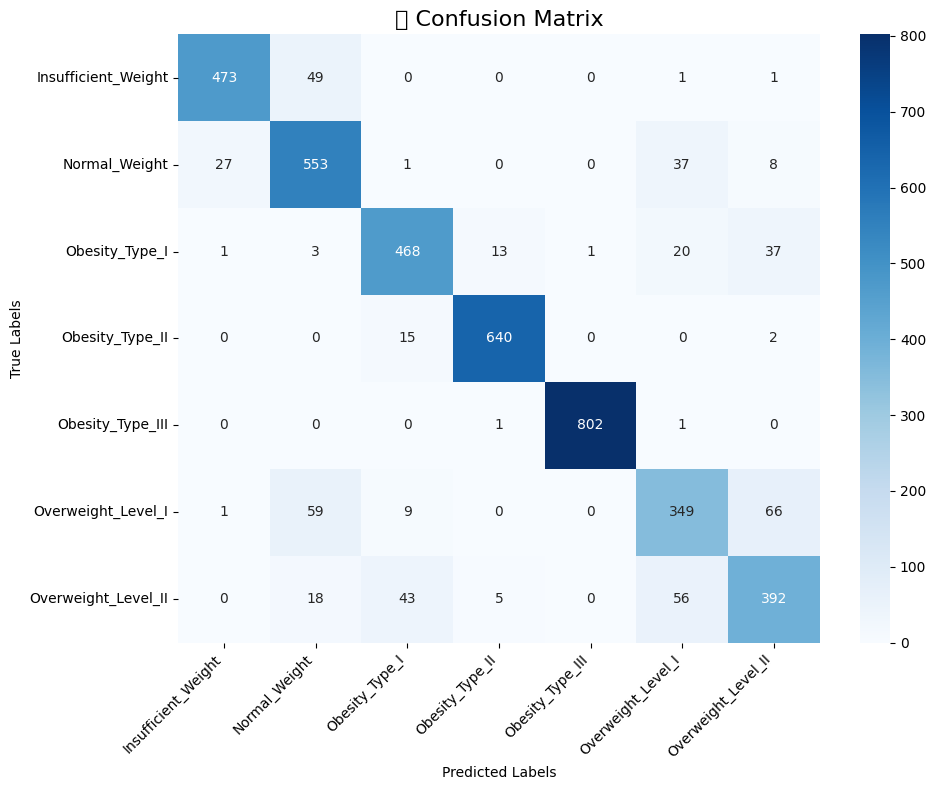

In [ ]:
# Train the model
dummy_rf_model = RandomForestClassifier(random_state=42)
dummy_rf_model.fit(X_train, y_train)

# Predictions
y_pred = dummy_rf_model.predict(X_val)

# Accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"\n🔍 Accuracy: {accuracy:.4f}")

# Classification report
report = classification_report(y_val, y_pred, target_names=dummy_rf_model.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("\n📋 Classification Report:\n")
print(report_df.round(2))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred, labels=dummy_rf_model.classes_)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=dummy_rf_model.classes_,
            yticklabels=dummy_rf_model.classes_)
plt.title('📊 Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
test_predictions = dummy_rf_model.predict(dummy_test_data.drop('NObeyesdad', axis=1))

predictions_df = pd.DataFrame({'id': dummy_test_data['id'], 'NObeyesdad': test_predictions})

predictions_df.to_csv('predictions_dummy_random_forest.csv', index=False)
